# Very quick presentation of Theano

**Theano** is a compiler for mathematical expressions written in Theano. Devise any mathematical expression in the syntax of the well-established core numerics package **numpy**, and Theano will create C-code to evaluate this expression and compile it. It is also possible to generate cuda-code for GPU by simply changing a flag. Of great interest is also the fact that gradients for any scalar function can be calculated automatically, making gradient errors in the construction and training of neural networks a thing of the past.

### Structure of this notebook
- a micro-presentation of numpy
- a micro-introduction to Theano
- a logistic regression with Theano
- an XOR network with Theano
- a multi-layer perceptron with Theano

### Preamble
At the beginning of an IPython notebook, we try to do all the necessary imports

In [1]:
import numpy as np
import theano
import theano.tensor as T

%matplotlib inline
import matplotlib.pyplot as plt

Using gpu device 0: GRID K520 (CNMeM is disabled)
/home/ubuntu/venv/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Numpy

Numpy is the core numerics package in Python. It is centered around array processing exactly like matlab, and provides a very user-friendly front-end to highly optimized numerical libraries.

In [2]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [4]:
a = np.zeros(5)
a[0] = 1
a

array([ 1.,  0.,  0.,  0.,  0.])

In [6]:
a[1] = 2
a

array([ 1.,  2.,  0.,  0.,  0.])

In [7]:
a[2:4] = 5

In [8]:
a

array([ 1.,  2.,  5.,  5.,  0.])

In [9]:
a[-1] = 10

In [10]:
a

array([  1.,   2.,   5.,   5.,  10.])

In [11]:
a.shape

(5,)

In [12]:
b = np.ones([3, 4])
b

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [13]:
b.shape

(3, 4)

In [14]:
b[0]

array([ 1.,  1.,  1.,  1.])

In [15]:
b[0] = 2
b

array([[ 2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [16]:
b[:, 0]

array([ 2.,  1.,  1.])

In [17]:
b[:, 0] = 5

In [18]:
b

array([[ 5.,  2.,  2.,  2.],
       [ 5.,  1.,  1.,  1.],
       [ 5.,  1.,  1.,  1.]])

In [20]:
b[-1, -1] = 10
b

array([[  5.,   2.,   2.,   2.],
       [  5.,   1.,   1.,   1.],
       [  5.,   1.,   1.,  10.]])

In [24]:
b.ravel()

array([  5.,   2.,   2.,   2.,   5.,   1.,   1.,   1.,   5.,   1.,   1.,
        10.])

Arrays are just lots of numbers placed next to each other in memory. Numpy remembers the shape they are supposed to have and presents it to us and the algorithms as vectors or matrices or higher-dimensional arrays.

Arrays are so general, they can serve many many purposes:

#### Coordinates

In [31]:
coords = np.array([[0, 0], [1, 0], [1, 2], [0, 1], [0, 0]]).T
print(coords)

[[0 1 1 0 0]
 [0 0 2 1 0]]


[-1, 10, -1, 10]

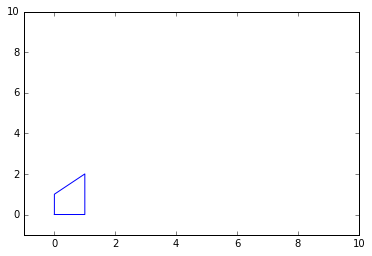

In [33]:
plt.plot(coords[0], coords[1])
plt.axis([-1, 10, -1, 10])

#### shift vectors

[-1, 10, -1, 10]

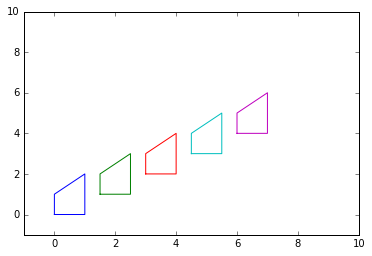

In [38]:
translation = np.array([[1.5], [1]])
for i in range(5):
    shifted = coords + translation * i
    plt.plot(shifted[0], shifted[1])
plt.axis([-1, 10, -1, 10])